# Student Performance (Multiple Linear Regression)

## problem description
The Student Performance Dataset, comprising 10,000 student records, offers a comprehensive exploration of factors influencing academic success. Key variables, including hours studied, previous scores, extracurricular activities, sleep hours, and practiced sample question papers, contribute to the understanding of each student's academic journey. The Performance Index, ranging from 10 to 100, serves as a rounded measure of overall academic performance. Researchers can leverage this synthetic dataset to uncover insights into the impact of these variables on student success, aiding educational strategies and interventions. Note: This dataset is crafted for illustrative purposes, and its relationships may not reflect real-world scenarios.

## import and understand data

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import  seaborn as sns 
%matplotlib inline 

In [6]:
df=pd.read_csv("Student_Performance.csv")

In [7]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [9]:
df.shape

(10000, 6)

In [10]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## data cleaning

### dealing with missing values 

In [12]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

does not exist null values ​​in our dataset, therefore and clean

### convert the categorical variable

In [13]:
# Transform the categorical variable 'Extracurricular Activities' into dummy variables
df_encoded = pd.get_dummies(df['Extracurricular Activities'], prefix='Extracurricular')

# Add the new columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Remove the original column if you do not wish to keep it
df = df.drop('Extracurricular Activities', axis=1)

# Display the resulting DataFrame
df.head(3)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_No,Extracurricular_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True


## Exploratry Data Analysis 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


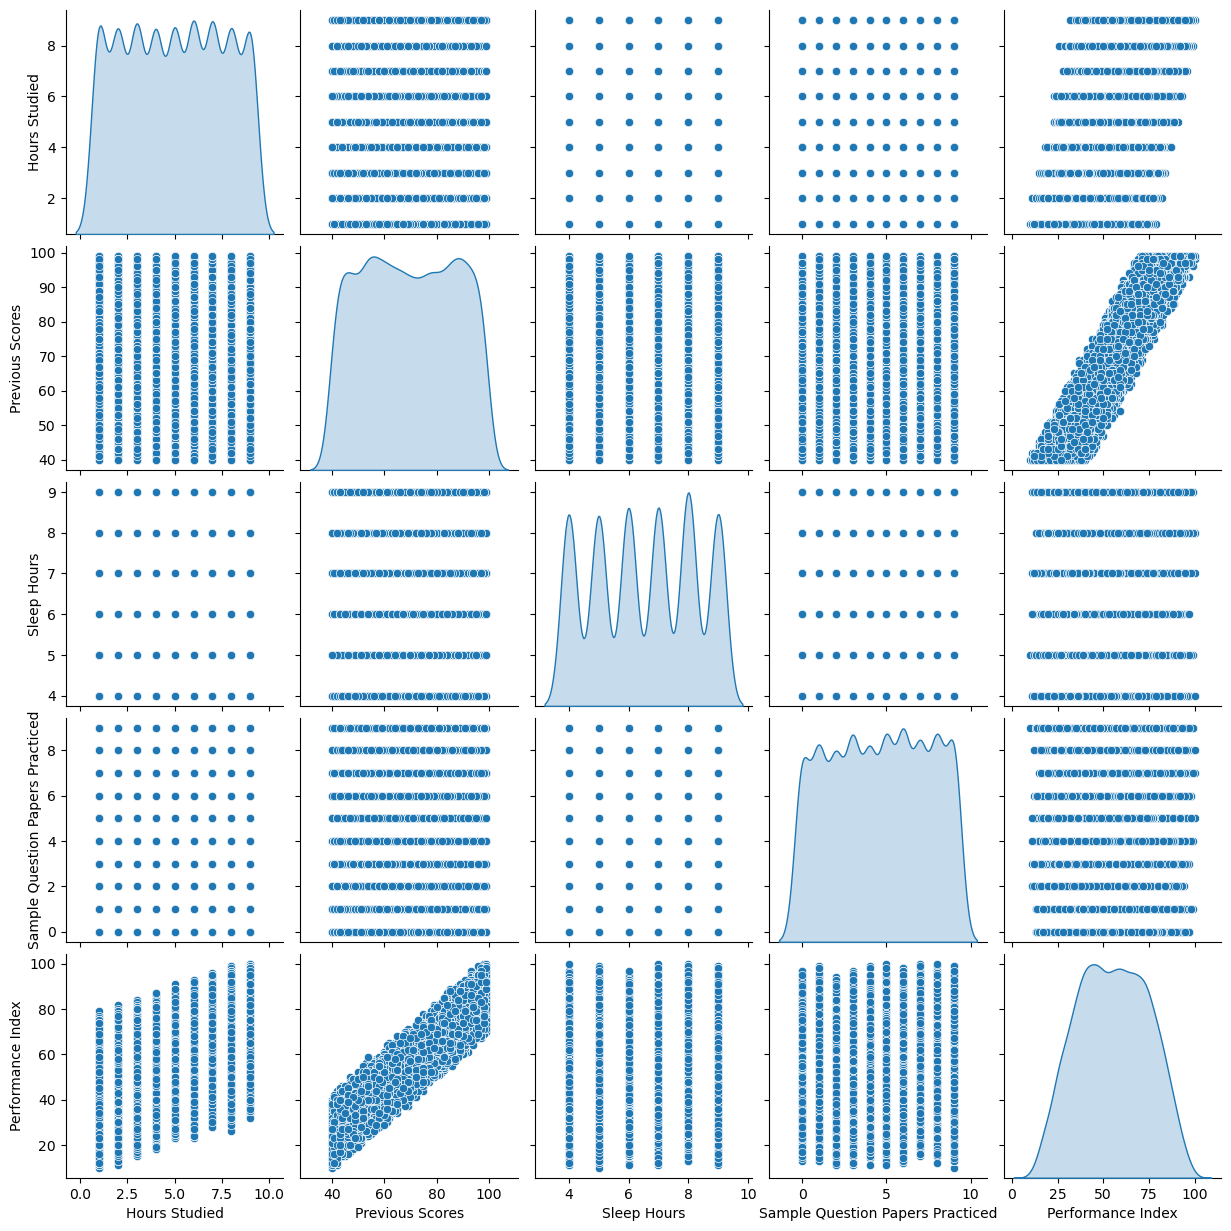

In [14]:
# Create a new dataframe of only numeric variables:

student = df[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

sns.pairplot(student, diag_kind='kde')
plt.show()

#### --

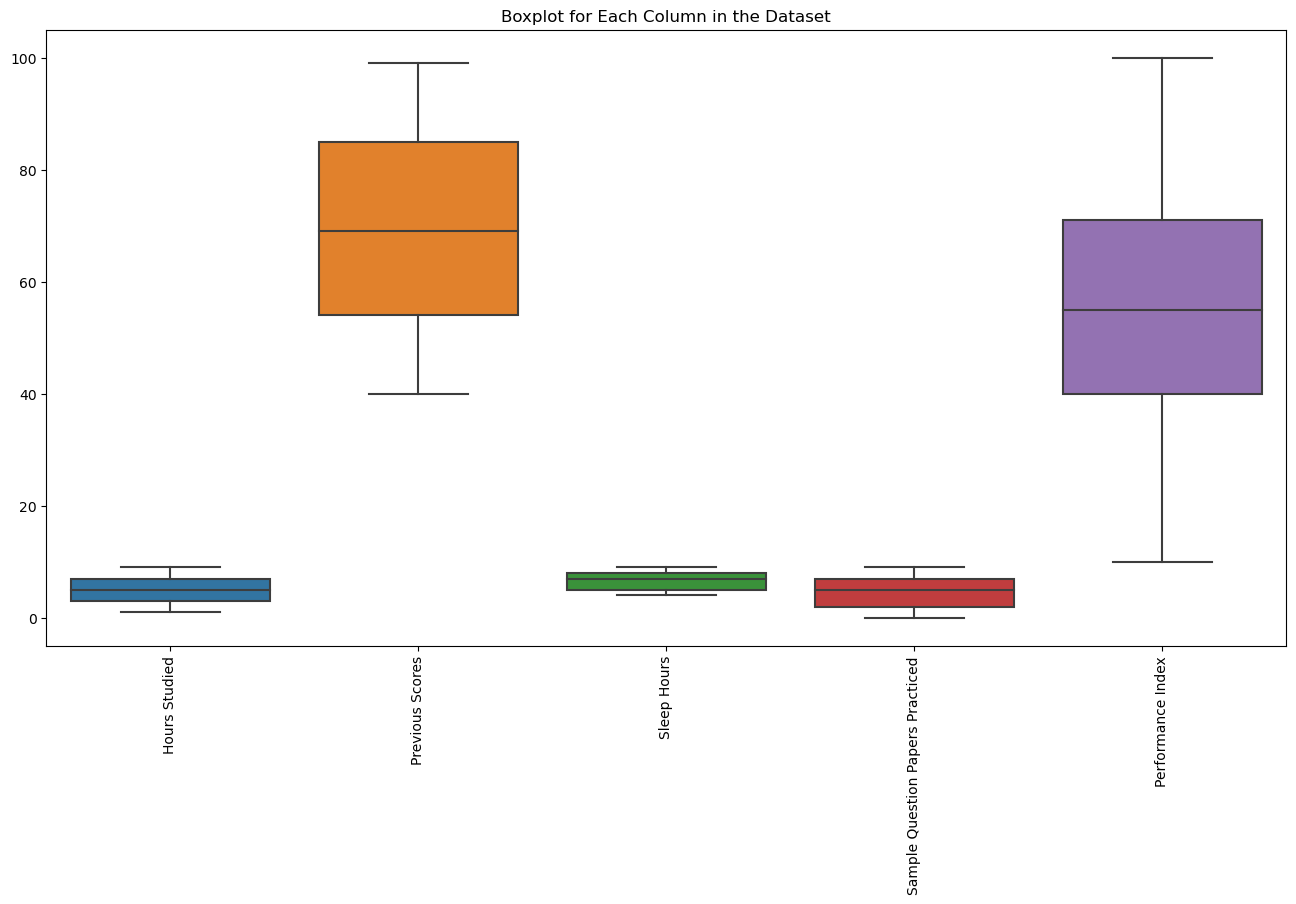

In [15]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Use seaborn to create boxplots for each column
sns.boxplot(data=df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']], orient='v')  # 'orient' specifies the orientation, 'v' for vertical

# Add informative labels
plt.title('Boxplot for Each Column in the Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


so according to the graph above we find that outliers do not exist in our dataset

In [16]:
from scipy.stats import pearsonr
# Liste des colonnes d'intérêt
columns_of_interest = ['Hours Studied', 'Previous Scores' ,'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index','Extracurricular_No','Extracurricular_Yes']

# Boucle sur chaque colonne pour calculer la corrélation
for column in columns_of_interest:
    # Calculez la corrélation et la p-value
    correlation_coefficient, p_value = pearsonr(df[column], df['Performance Index'])
    
    # Imprimez les résultats
    print(f"Correlation between {column} and Performance Index: {correlation_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("\n")

Correlation between Hours Studied and Performance Index: 0.3737
P-value: 0.0000


Correlation between Previous Scores and Performance Index: 0.9152
P-value: 0.0000


Correlation between Sleep Hours and Performance Index: 0.0481
P-value: 0.0000


Correlation between Sample Question Papers Practiced and Performance Index: 0.0433
P-value: 0.0000


Correlation between Performance Index and Performance Index: 1.0000
P-value: 0.0000


Correlation between Extracurricular_No and Performance Index: -0.0245
P-value: 0.0142


Correlation between Extracurricular_Yes and Performance Index: 0.0245
P-value: 0.0142




From the above calculations, we see that all the important columns and almost have a strong relationship with the target variable.

--

--

## Building Model

### split train/test

In [17]:
from sklearn.model_selection import (
    train_test_split,
) 
from sklearn.linear_model import LinearRegression

In [18]:
y=df['Performance Index']

In [19]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [20]:
x= df[['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced',
       'Extracurricular_No', 'Extracurricular_Yes']]
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular_No,Extracurricular_Yes
0,7,99,9,1,False,True
1,4,82,4,2,True,False
2,8,51,7,2,False,True
3,5,52,5,2,False,True
4,7,75,8,5,True,False
...,...,...,...,...,...,...
9995,1,49,4,2,False,True
9996,7,64,8,5,False,True
9997,6,83,8,5,False,True
9998,9,97,7,0,False,True


In [21]:
#split dataset into two parts training test
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2)

In [22]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [23]:
pred_test=regression.predict(x_test)

## Model Evaluation 

#### R-squared (R^2 Determination coefficient):

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred_test)
print ("R^2  =",r2)

R^2  = 0.9881560258797638


#### MSE (Mean Squared Error)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test)
print ("MSE =",mse)

MSE = 4.380564178614639


so according to (Mean Squared Error and r2 we see that the model works well